## Human in the loop
Enhances agent capabilities through several common user interaction patterns which are:
- Approval
- Editing
- Input

## Breakpoing
adding it in a specific location in the graph flow is one way to enable human in the loop.

In [2]:
import os
import dotenv

dotenv.load_dotenv()

True

In [3]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [4]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

class State(TypedDict):
    input: str
    
def step_1(state):
    print("step1")

def step_2(state):
    print("step2")

def step_3(state):
    print("step3")
    
builder = StateGraph(State)

builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.add_edge(START, "step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

memory = MemorySaver()

graph = builder.compile(
    checkpointer=memory,
    interrupt_before=["step_3"]
)

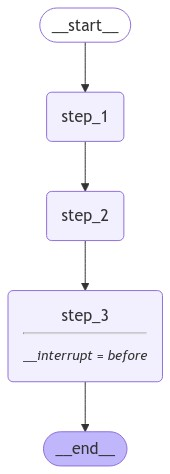

In [8]:
# display graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
initial_input = {
    "input": "Hello World"
}

thread = {
    "configurable": {
        "thread_id": "1"
    }
}

for event in graph.stream(initial_input, thread, stream_mode="values"):
    print(event)

try:
    user_approval = input("Do you approve? (yes/no): ")
except:
    user_approval = "yes"
    
if user_approval.lower() == "yes":
    for event in graph.stream(None, thread, stream_mode="values"):
        print(event)
else:
    print("User did not approve")

{'input': 'Hello World'}
step1
step2
{'input': 'Hello World'}
step3
